In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
dataset = pd.read_csv('datasets/heart.csv')

In [24]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
dataset.shape

(303, 14)

In [26]:
data = dataset.drop('target', axis=1)

In [27]:
data.shape

(303, 13)

In [28]:
labels = dataset["target"]

In [29]:
labels.shape

(303,)

In [30]:
X, X_test, y, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [31]:
X.shape

(242, 13)

In [32]:
X_test.shape

(61, 13)

In [33]:
clf = LogisticRegression(random_state=42, max_iter=500)

In [34]:
clf.fit(X, y)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
clf.score(X, y)

0.8677685950413223

In [36]:
clf.score(X_test, y_test)

0.8688524590163934

In [37]:
y_pred = clf.predict(X_test)

In [38]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [39]:
clf.predict_proba(X_test)

array([[0.90972973, 0.09027027],
       [0.28712845, 0.71287155],
       [0.13771756, 0.86228244],
       [0.97391786, 0.02608214],
       [0.05144968, 0.94855032],
       [0.09814233, 0.90185767],
       [0.39986449, 0.60013551],
       [0.99826657, 0.00173343],
       [0.99420919, 0.00579081],
       [0.53285175, 0.46714825],
       [0.25407864, 0.74592136],
       [0.93638457, 0.06361543],
       [0.08902043, 0.91097957],
       [0.9646624 , 0.0353376 ],
       [0.01416461, 0.98583539],
       [0.0544308 , 0.9455692 ],
       [0.01697891, 0.98302109],
       [0.9310481 , 0.0689519 ],
       [0.9924231 , 0.0075769 ],
       [0.98750403, 0.01249597],
       [0.33042655, 0.66957345],
       [0.98566898, 0.01433102],
       [0.85184708, 0.14815292],
       [0.23681836, 0.76318164],
       [0.06989493, 0.93010507],
       [0.3210641 , 0.6789359 ],
       [0.11624521, 0.88375479],
       [0.37760713, 0.62239287],
       [0.99116449, 0.00883551],
       [0.0788122 , 0.9211878 ],
       [0.

In [18]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [19]:
confusion_matrix(y_test, y_pred)

array([[25,  4],
       [ 4, 28]], dtype=int64)

In [20]:
target_names = ["healthy", "patient"]

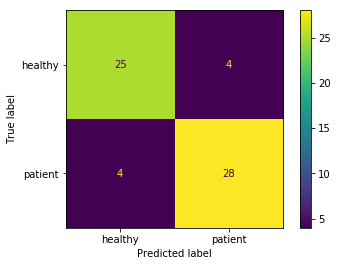

In [21]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=target_names).plot()

In [23]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     healthy       0.86      0.86      0.86        29
     patient       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [24]:
thresh = []
accs = []

for i in range(0, 100):
    y_proba = clf.predict_proba(X_test)[:, 1]
    y_proba[y_proba >= i / 100.] = 1
    y_proba[y_proba < i / 100.] = 0
    thresh.append(i / 100.)
    accs.append(clf.score(X_test, y_proba))
    
thresh = np.array(thresh)
accs = np.array(accs)

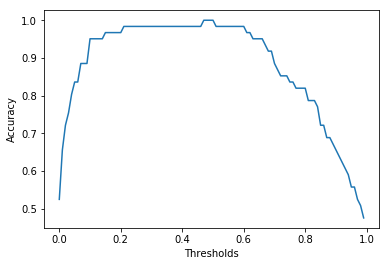

In [25]:
plt.xlabel('Thresholds')
plt.ylabel('Accuracy')
plt.plot(thresh, accs)

In [26]:
thresh[accs == np.max(accs)]

array([0.47, 0.48, 0.49, 0.5 ])

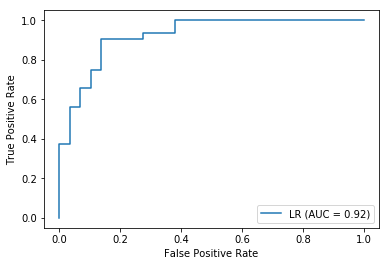

In [27]:
y_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='LR')
display.plot()
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

In [29]:
from sklearn.metrics import mean_absolute_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5